In [1]:
import torch
from diffusers import StableDiffusionPipeline

model_path='/content/drive/MyDrive/my_model1/lora_finetuning_weights/pytorch_lora_weights.safetensors'

repo = "Bingsu/my-k-anything-v3-0"
pipeline = StableDiffusionPipeline.from_pretrained(
    repo, torch_dtype=torch.float16,
    low_cpu_mem_usage=False
)
pipeline.unet.load_attn_procs(model_path)
pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/870k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Bingsu--my-k-anything-v3-0/snapshots/577906492254b52951357f4561b727b61560c78b/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Bingsu--my-k-anything-v3-0/snapshots/577906492254b52951357f4561b727b61560c78b/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Bingsu--my-k-anything-v3-0/snapshots/577906492254b52951357f4561b727b61560c78b/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Bingsu--my-k-anything-v3-0/snapshots/577906492254b52951357f4561b727b61560c78b/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:221:

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "Bingsu/my-k-anything-v3-0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]

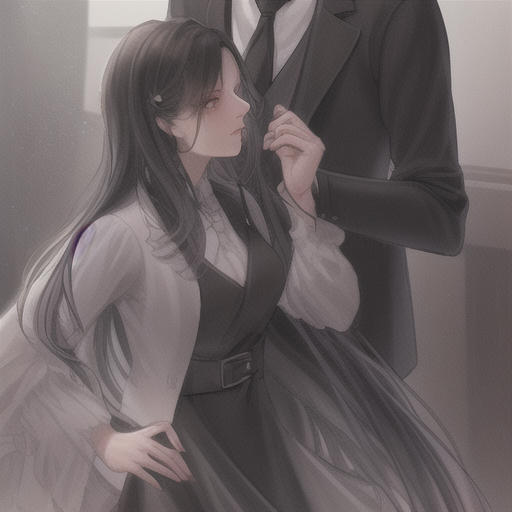

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["검은 정장의 남자와 드레스를 입은 여자"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

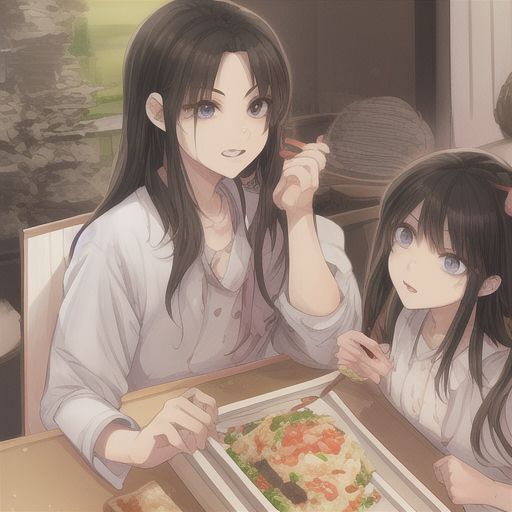

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["밥을 먹는 사람"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

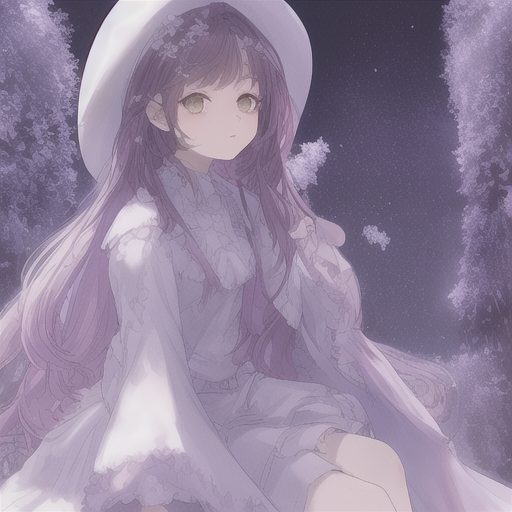

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["보라색 하늘 아래 흰색 모자를 쓰고 꽃밭에 앉아있는 사람"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

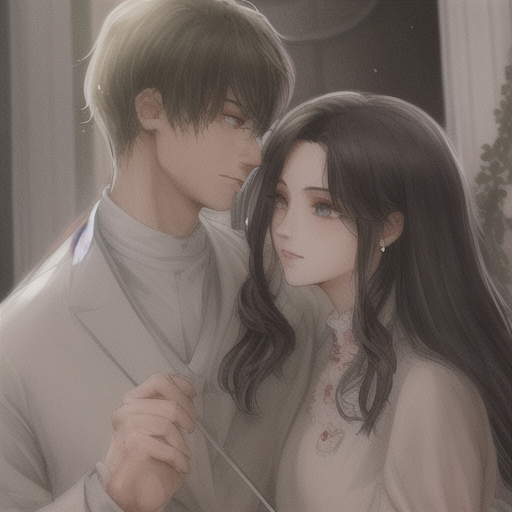

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["성당 안에서 검은 머리의 남자와 여자의 결혼식"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

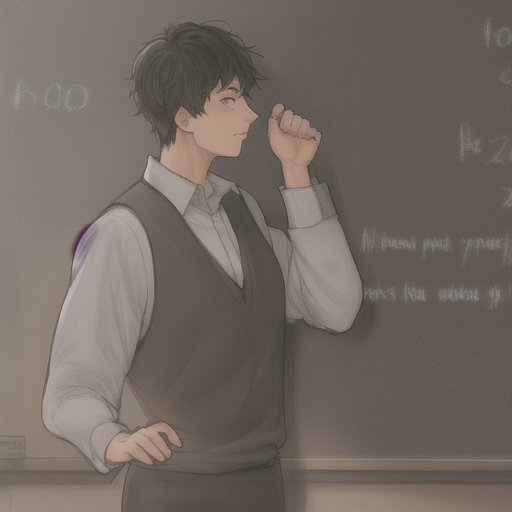

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["칠판 앞에 있는 검은색 짧은 머리의 남자"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

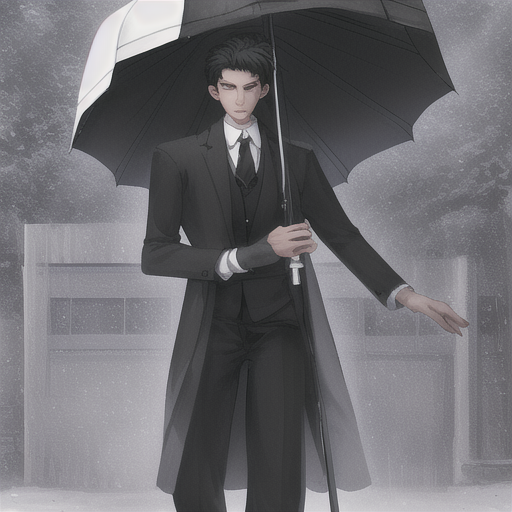

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["눈 오는 날 하얀 우산을 쓰고 검은 머리의 정장을 입은 남자"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

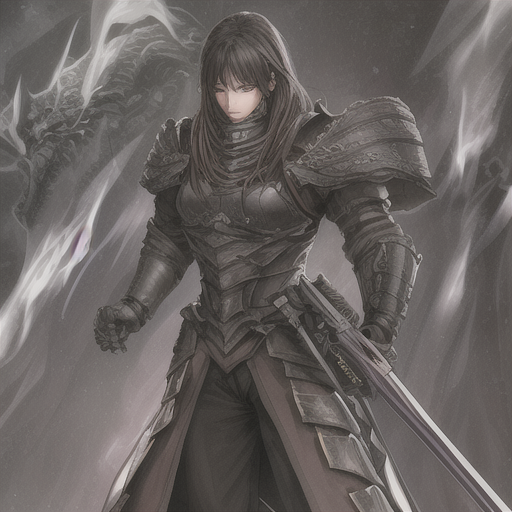

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["갑옷을 입은 검은 머리의 기사"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

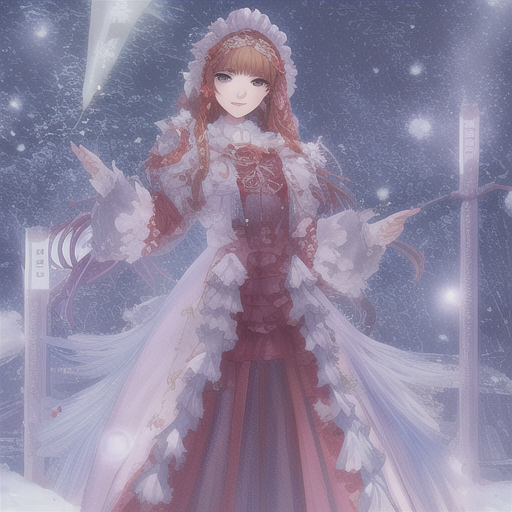

In [ ]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["눈꽃을 배경으로 서 있는 여자"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

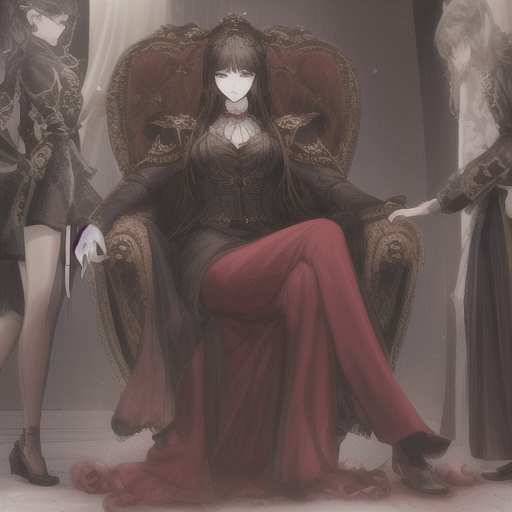

In [8]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["궁전, 앉아있는 검은색의 옷을 입은 사람"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

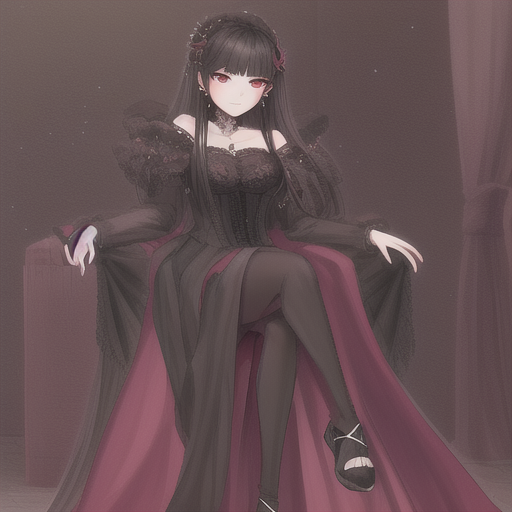

In [16]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["검은색의 드레스를 입은 귀족"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

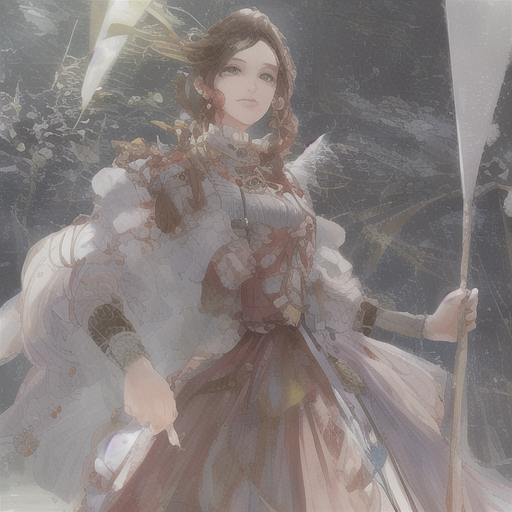

In [24]:
lora_scale = 0.4

pipeline.safety_checker = None

pipeline_output = pipeline(
    prompt=["관중들 앞에서 발표하는 사람"],
    num_inference_steps=25,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

pipeline_output.images[0]